In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
from decimal import *
import math

In [3]:
raw_H_copolar = """
0 : -55.8
5 : -55.2
10: -55.6
15: -56.5
20: -58.6
30: -63.1
40: -68.3
50: -73.3
60: -79.4
70: -84.1
80: -86.3
90: -84.8
100: -86.4
110: -96.7
120: -90.1
130: -88.4
140: -80.6
150: -75.5
160: -77
170: -73.4
180: -68.3
-180: -68.3
190: -71
200: -71.3
210: -71.9
220: -66.3
230: -74.6
240: -73.6
250: -78
260: -75
270: -88.6
280: -76
290: -73.1
300: -86.9
310: -74.3
320: -67
330: -66.2
340: -65.2
345: -61.8
350: -60.1
355: -56.9
"""
#360: -55.8

raw_H_crosspolar = """
-90: -89.8
-80: -89.5
-70: -91.6
-60: -89.5
-50: -92.3
-40: -93.1
-30: -85.6
-25: -85.9
-20: -89.5
-15: -87.3
-10: -87.9
-5: -85.8
0: -82.1
5: -80.6
10: -80.7
15: -81.1
20: -82.6
25: -83.5
30: -83.9
40: -86.2
50: -89.8
60: -92.7
70: -94
80: -94.9
90: -96
"""

raw_E_copolar = """
0: -55.3
5: -55.6
10: -56.8
15: -58.8
20: -60.7
30: -62.3
40: -64.3
50: -71.1
60: -82.2
70: -75.3
80: -78.2
90: -84.1
100: -84.7
110: -87.2
120: -74.9
130: -81.5
140: -74.5
150: -75.6
160: -79.9
170: -87.4
180: -66.8
-180: -66.8
190: -69
200: -78.8
210: -77.6
220: -72.2
230: -65.5
240: -77.7
250: -74.9
260: -76.1
270: -75.8
280: -85.2
290: -76.9
300: -71.4
310: -68.8
320: -67.1
330: -73.9
340: -70.6
345: -59.7
350: -57.7
355: -56
"""
#360: -55.3
raw_E_crosspolar = """
-40: -91.2
-30: -82.7
-20: -73.5
-15: -72.9
-10: -71.6
-5: -70.4
0: -69.5
5: -69.3
10: -70.1
15: -71.2
20: -73.9
30: -81.9
40: -90
"""

raw_H_crosspolar = raw_H_crosspolar.replace(':', '').split()
H_crosspolar = np.array(raw_H_crosspolar, dtype=np.float32).reshape(25, 2).transpose()
H_crosspolar[1] += 71.4

raw_E_crosspolar = raw_E_crosspolar.replace(':', '').split()
E_crosspolar = np.array(raw_E_crosspolar, dtype=np.float32).reshape(13, 2).transpose()
E_crosspolar[1] += 71.4

raw_H_copolar = raw_H_copolar.replace(':', '').split()
H_copolar = np.array(raw_H_copolar, dtype=np.float32).reshape(41, 2).transpose()
H_copolar_rad = H_copolar[0].copy()*np.pi/180
H_copolar_sym = H_copolar.copy()

for i in range(H_copolar_sym[0].size):
    H_copolar_sym[1][i] = 71.4+H_copolar_sym[1][i]
    if (H_copolar_sym[0][i] > 180):
        H_copolar_sym[0][i] -= 360

for i in range(H_copolar_sym[0].size):
    for j in range(H_copolar_sym[0].size):
        if (H_copolar_sym[0][i] > H_copolar_sym[0][j] and j > i):
            aux1 = H_copolar_sym[0][i]
            aux2 = H_copolar_sym[1][i]
            
            H_copolar_sym[0][i] = H_copolar_sym[0][j]
            H_copolar_sym[1][i] = H_copolar_sym[1][j]
            
            H_copolar_sym[0][j] = aux1
            H_copolar_sym[1][j] = aux2
        
H_copolar[1] += 71.4
theta, gain = np.loadtxt("H-Plane Horn.dat", skiprows=2, usecols=[0, 1], unpack=True)
theta *= np.pi/180
gain += 16

raw_E_copolar = raw_E_copolar.replace(':', '').split()
E_copolar = np.array(raw_E_copolar, dtype=np.float32).reshape(41, 2).transpose()
E_copolar_rad = E_copolar[0].copy()*np.pi/180
E_copolar_sym = E_copolar.copy()
for i in range(E_copolar_sym[0].size):
    E_copolar_sym[1][i] = 71.4+E_copolar_sym[1][i]
    if (E_copolar_sym[0][i] > 180):
        E_copolar_sym[0][i] -= 360
for i in range(E_copolar_sym[0].size):
    for j in range(E_copolar_sym[0].size):
        if (E_copolar_sym[0][i] > E_copolar_sym[0][j] and j > i):
            aux1 = E_copolar_sym[0][i]
            aux2 = E_copolar_sym[1][i]
            
            E_copolar_sym[0][i] = E_copolar_sym[0][j]
            E_copolar_sym[1][i] = E_copolar_sym[1][j]
            
            E_copolar_sym[0][j] = aux1
            E_copolar_sym[1][j] = aux2

E_copolar[1] = 71.4+E_copolar[1]
thetaE, gainE = np.loadtxt("E-Plane Horn.dat", skiprows=2, usecols=[0, 1], unpack=True)
thetaE *= np.pi/180
gainE += 16

acH_theta, acH_gain = np.loadtxt("PBE_Grupo_4_phi_0_ph.txt", usecols=[0,1], unpack=True)
acH_gain += 41.45
acH_theta *= np.pi/180

acH_cross_theta, acH_cross_gain = np.loadtxt("PBE_Grupo_4_phi_0_th.txt", usecols=[0,1], unpack=True)
acH_cross_gain += 41.45
acH_cross_theta *= np.pi/180

acE_theta, acE_gain = np.loadtxt("PBE_Grupo_4_phi_90_th.txt", usecols=[0,1], unpack=True)
acE_gain += 41.45
acE_theta *= np.pi/180

acE_cross_theta, acE_cross_gain = np.loadtxt("PBE_Grupo_4_phi_90_ph.txt", usecols=[0,1], unpack=True)
acE_cross_gain += 41.45
acE_cross_theta *= np.pi/180

#print(acH_theta, acH_gain, acH_cross_theta, acH_cross_gain, acE_theta, acE_gain, acE_cross_theta, acE_cross_gain)

In [4]:
def np_to_list(x):
    return [float(i) for i in x]

def linearize(array):
    arr = []
    for x in array:
        context = Context(prec=3, rounding=ROUND_UP)
        decimal_part = context.create_decimal_from_float(float(x/10-math.floor(x/10)))
        missing_exp = context.create_decimal_from_float(float(Decimal("10")**decimal_part))
        x = float(Decimal("1e" + str(math.floor(x/10)))*missing_exp)
        arr.append(x)
    return arr

HPBW: 26º
PSLL: 17.9 dB
FNBW: 140.0 °
F/B: 41.5 dB


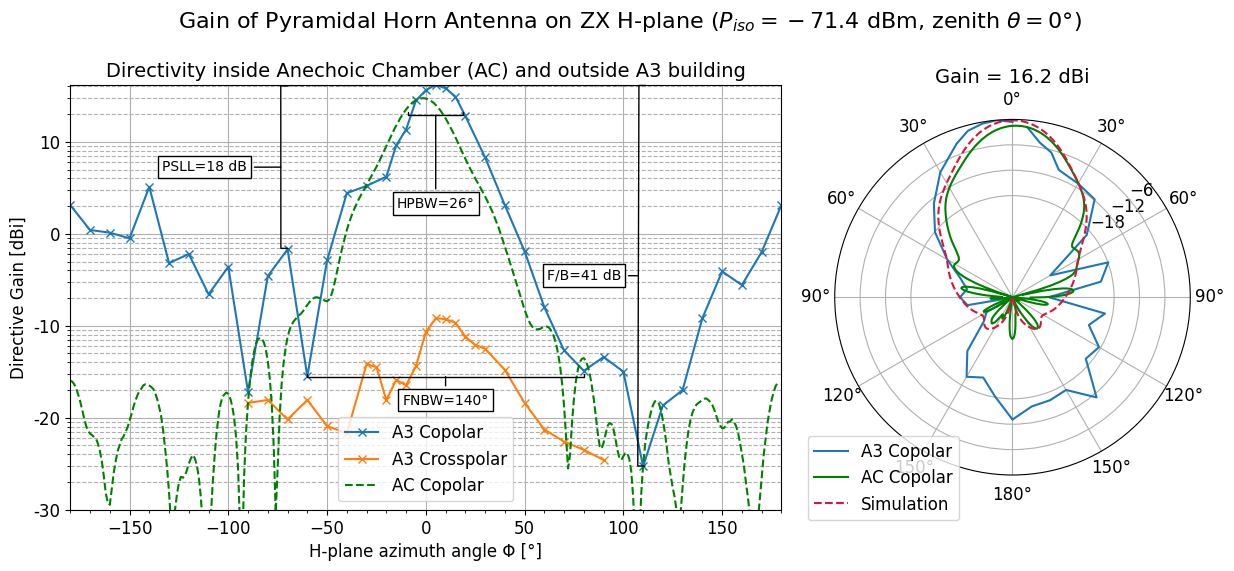

In [14]:
fig = plt.figure(figsize=(14, 5))

gs = fig.add_gridspec(1, 2,  width_ratios=(2, 1),
                      left=0.1, right=0.9, bottom=0.1, top=0.95,
                      wspace=0.1, hspace=0.05)

def decibel_fmt(x,pos=None):
    if x==0:
        return "-inf"
    else:
        return '{:.0f}'.format(10*np.log10(np.sign(x)*x))

def theta_fmt(x,pos=None):
    if x*180/np.pi<=180:
        return '{:.0f}°'.format(x*180/np.pi)
    if  x*180/np.pi>180:
        return '{:.0f}°'.format(360-x*180/np.pi)

ax1 = fig.add_subplot(gs[0,0])

H_copolar_lin = linearize(np_to_list(H_copolar_sym[1]))
ax1.plot(H_copolar_sym[0], H_copolar_lin, label="A3 Copolar", marker="x")

H_crosspolar_lin = linearize(np_to_list(H_crosspolar[1]))
ax1.plot(H_crosspolar[0], H_crosspolar_lin, label="A3 Crosspolar", marker="x")

acH_lin = linearize(np_to_list(acH_gain))
ax1.plot(acH_theta*180/np.pi, acH_lin, label="AC Copolar", linestyle="--", color="green")

#acH_cross_lin = linearize(np_to_list(acH_cross_gain))
#ax1.plot(acH_cross_theta*180/np.pi, acH_cross_lin, label="AC Crosspolar", linestyle="--", color="crimson")

ax1.set_title("Directivity inside Anechoic Chamber (AC) and outside A3 building", fontsize=14)
ax1.set_xlabel("H-plane azimuth angle Φ [°]", fontsize=12)
ax1.set_ylabel("Directive Gain [dBi]", fontsize=12)
ax1.minorticks_on()
ax1.grid(True, which="minor", axis="y", linestyle="--")
ax1.set_yscale("log")
ax1.yaxis.set_major_formatter(mtick.FuncFormatter(decibel_fmt))
ax1.set_ylim(0.001, 41.8)
ax1.axhline(y=np.max(H_copolar_lin), xmin=0.30, xmax=0.514, linestyle="--", color="black", linewidth=1.0)
ax1.annotate("HPBW=26°", xy=(5, np.max(H_copolar_lin)-20.9), xytext=(5, np.max(H_copolar_lin)-40), fontsize=10.0, ha='center', va='bottom',
             bbox=dict(boxstyle='square', fc='white', color='k'), arrowprops=dict(arrowstyle='-[, widthB=2, lengthB=0.2', lw=1.0, color='k'))
ax1.annotate("PSLL=18 dB", xy=(-72, 5.31), xytext=(-112, 4.45), fontsize=10.0, ha='center', va='bottom',
             bbox=dict(boxstyle='square', fc='white', color='k'), arrowprops=dict(arrowstyle='-[, widthB=5.85, lengthB=0.5', lw=1.0, color='k'))
ax1.axhline(y=np.max(H_copolar_lin), xmin=0.514, xmax=0.8, linestyle="--", color="black", linewidth=1.0)
ax1.annotate("F/B=41 dB", xy=(109, 0.35), xytext=(80, 0.295), fontsize=10.0, ha='center', va='bottom',
             bbox=dict(boxstyle='square', fc='white', color='k'), arrowprops=dict(arrowstyle='-[, widthB=13.7, lengthB=0.5', lw=1.0, color='k'))
ax1.annotate("FNBW=140°", xy=(10, 0.03), xytext=(10, 0.013), fontsize=10.0, ha='center', va='bottom',
             bbox=dict(boxstyle='square', fc='white', color='k'), arrowprops=dict(arrowstyle='-[, widthB=10, lengthB=0.2', lw=1.0, color='k'))
ax1.set_xlim(-180, 180)
ax1.grid(True)
plt.tick_params(labelsize=12)
plt.legend(loc="lower center", fontsize=12)

""" 
13.2 dB está entre -10º y -5º izquierda (y entre 15º y 20º derecha)
Izquierda: Pendiente de 5º/3.2 dB = 1.56º/dB => en -5º el valor es 14.5 dB y por tanto 1.3 dB por encima de 13.2 (16.2-3) => 1.3dB*1.56º/dB
=2.03º
Derecha: Pendiente de 5º/2.1 dB = 2.38º/dB => en 15º el valor es 14.9 dB y por tanto 1.7 dB por encima de 13.2 => 1.7dB*2.38º/dB
=4.05º
HPBW = (5º - (-5º) + Izquierda) + (15º - 5º + Derecha) = 10º + 2.03º + 10º + 4.05º = 26.08º
"""
print("HPBW: 26º")
print("PSLL: {:.1f} dB".format(H_copolar_sym[1][21]-H_copolar_sym[1][11]))
print("FNBW: {:.1f} °".format(H_copolar_sym[0][30]-H_copolar_sym[0][12]))
print("F/B: {:.1f} dB".format(max(H_copolar_sym[1])-min(H_copolar_sym[1])))

ax2 = fig.add_subplot(gs[0,1], projection='polar')
ax2.plot(H_copolar_rad, H_copolar[1]-16.2, label="A3 Copolar")
ax2.plot(acH_theta, acH_gain-16.2, label="AC Copolar", color="green")
ax2.plot(theta, gain-16.2, label="Simulation", linestyle='--', color="crimson")
ax2.set_title("Gain = 16.2 dBi", fontsize=14)
ax2.set_rmax(0)
ax2.set_rmin(-42)
ax2.set_theta_zero_location('N')
ax2.set_rticks([-18, -12, -6])  # Less radial ticks
ax2.set_rlabel_position(-50)  # Move radial labels away from plotted line
ax2.set_thetagrids((0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330))
ax2.xaxis.set_major_formatter(mtick.FuncFormatter(theta_fmt))
ax2.grid(True)
plt.tick_params(labelsize=12)
plt.legend(loc="lower left", bbox_to_anchor=(-0.1, -0.15), fontsize=12)

fig.suptitle("Gain of Pyramidal Horn Antenna on ZX H-plane ($P_{iso}=-71.4$ dBm, zenith $θ = 0°$)", fontsize=16, y=1.1)

fig.savefig("gain_horn_antenna_H-plane.png", dpi=400, bbox_inches='tight')
fig.savefig("gain_horn_antenna_H-plane.pdf", bbox_inches="tight")

HPBW: 25.5º
PSLL: 11.8 dB
FNBW: 140.0 °
F/B: 32.1 dB


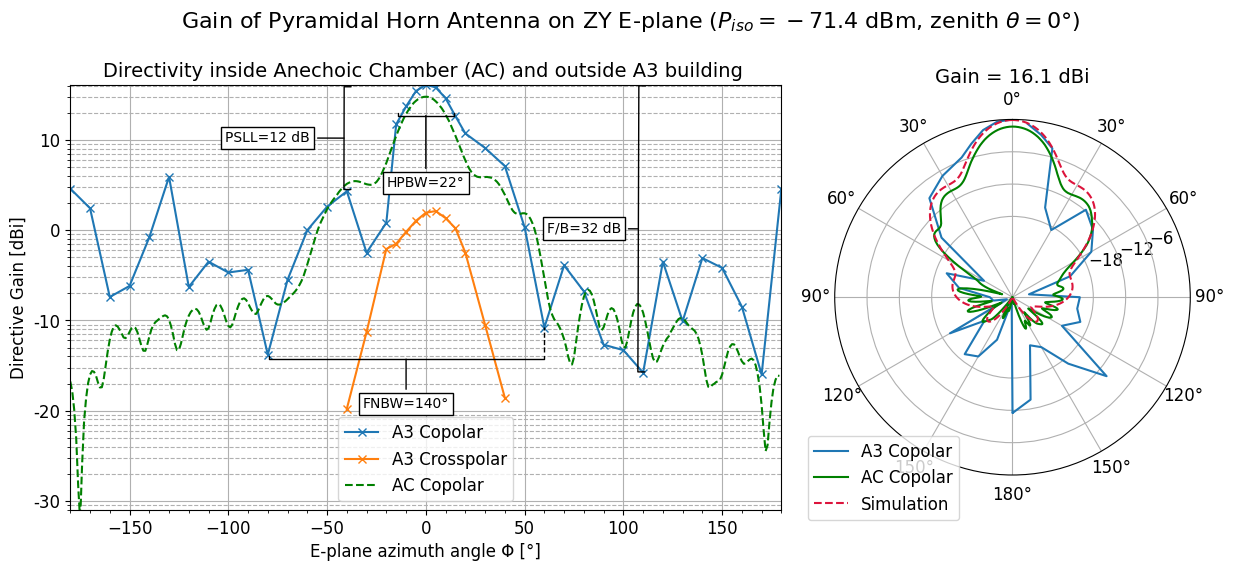

In [16]:
fig = plt.figure(figsize=(14, 5))

gs = fig.add_gridspec(1, 2,  width_ratios=(2, 1),
                      left=0.1, right=0.9, bottom=0.1, top=0.95,
                      wspace=0.1, hspace=0.05)

def decibel_fmt(x,pos=None):
    if x==0:
        return "-inf"
    else:
        return '{:.0f}'.format(10*np.log10(np.sign(x)*x))

def theta_fmt(x,pos=None):
    if x*180/np.pi<=180:
        return '{:.0f}°'.format(x*180/np.pi)
    if  x*180/np.pi>180:
        return '{:.0f}°'.format(360-x*180/np.pi)

ax1 = fig.add_subplot(gs[0,0])

E_copolar_lin = linearize(np_to_list(E_copolar_sym[1]))
ax1.plot(E_copolar_sym[0], E_copolar_lin, label="A3 Copolar", marker="x")

E_crosspolar_lin = linearize(np_to_list(E_crosspolar[1]))
ax1.plot(E_crosspolar[0], E_crosspolar_lin, label="A3 Crosspolar", marker="x")

acE_lin = linearize(np_to_list(acE_gain))
ax1.plot(acE_theta*180/np.pi, acE_lin, label="AC Copolar", linestyle="--", color="green")

#acE_cross_lin = linearize(np_to_list(acE_cross_gain))
#ax1.plot(acE_cross_theta*180/np.pi, acE_cross_lin, label="AC Crosspolar", linestyle="--", color="red")

gs
ax1.set_title("Directivity inside Anechoic Chamber (AC) and outside A3 building ", fontsize=14)
ax1.set_xlabel("E-plane azimuth angle Φ [°]", fontsize=12)
ax1.set_ylabel("Directive Gain [dBi]", fontsize=12)
ax1.minorticks_on()
ax1.grid(True, which="minor", axis="y", linestyle="--")
ax1.set_yscale("log")
ax1.yaxis.set_major_formatter(mtick.FuncFormatter(decibel_fmt))
ax1.set_xlim(-180, 180)
ax1.set_ylim(0.0008, 40.9)
ax1.annotate("HPBW=22°", xy=(0, np.max(E_copolar_lin)-20.9), xytext=(0, np.max(H_copolar_lin)-39), fontsize=10.0, ha='center', va='bottom',
             bbox=dict(boxstyle='square', fc='white', color='k'), arrowprops=dict(arrowstyle='-[, widthB=2, lengthB=0.2', lw=1.0, color='k'))
ax1.annotate("PSLL=12 dB", xy=(-40, 10.47), xytext=(-80, 8.8), fontsize=10.0, ha='center', va='bottom',
             bbox=dict(boxstyle='square', fc='white', color='k'), arrowprops=dict(arrowstyle='-[, widthB=3.7, lengthB=0.5', lw=1.0, color='k'))
ax1.axvline(x=60, ymin=0.37, ymax=0.43, linestyle="--", color="black", linewidth=1.0)
ax1.annotate("FNBW=140°", xy=(-10, 0.04), xytext=(-10, 0.01), fontsize=10.0, ha='center', va='bottom',
             bbox=dict(boxstyle='square', fc='white', color='k'), arrowprops=dict(arrowstyle='-[, widthB=9.9, lengthB=0.2', lw=1.0, color='k'))
ax1.annotate("F/B=32 dB", xy=(109, 1.035), xytext=(80, 0.87), fontsize=10.0, ha='center', va='bottom',
             bbox=dict(boxstyle='square', fc='white', color='k'), arrowprops=dict(arrowstyle='-[, widthB=10.3, lengthB=0.5', lw=1.0, color='k'))

ax1.grid(True)
plt.tick_params(labelsize=12)
plt.legend(loc = "lower center", fontsize=12)

""" 
13.1 dB está entre -10º y -15º izquierda (y entre 10º y 15º derecha)
Izquierda: Pendiente de 5º/2 dB = 2.5º/dB => en -10º el valor es 13.7 dB y por tanto 0.6 dB por encima de 13.1 (16.1-3) => 0.6dB*2.5º/dB
=1.5º
Derecha: Pendiente de 5º/2 dB = 2.5º/dB => en 15º el valor es 14.7 dB y por tanto 1.6 dB por encima de 13.1 => 1.6dB*2.5º/dB
=4º
HPBW = (5º - (-5º) + Izquierda) + (15º - 5º + Derecha) = 10º + 1.5º + 10º + 4º = 25.5º
"""
print("HPBW: 25.5º")
print("PSLL: {:.1f} dB".format(E_copolar_sym[1][20]-E_copolar_sym[1][14]))
print("FNBW: {:.1f} °".format(E_copolar_sym[0][30]-E_copolar_sym[0][12]))
print("F/B: {:.1f} dB".format(max(E_copolar_sym[1])-min(E_copolar_sym[1])))

ax2 = fig.add_subplot(gs[0,1], projection='polar')
ax2.plot(E_copolar_rad, E_copolar[1]-16.1, label="A3 Copolar")
ax2.plot(acE_theta, acE_gain-16.1, label="AC Copolar", color="green")
ax2.plot(thetaE, gainE-16.1, label="Simulation", linestyle='--', color="crimson")
ax2.set_title("Gain = 16.1 dBi", fontsize=14)
ax2.set_rmax(0)
ax2.set_rmin(-33)
ax2.set_theta_zero_location('N')
ax2.set_rticks([-18, -12, -6])  # Less radial ticks
ax2.set_rlabel_position(-70)  # Move radial labels away from plotted line
ax2.set_thetagrids((0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330))
ax2.xaxis.set_major_formatter(mtick.FuncFormatter(theta_fmt))
plt.tick_params(labelsize=12)
plt.legend(loc='lower left', bbox_to_anchor=(-0.1, -0.15), fontsize=12)

fig.suptitle("Gain of Pyramidal Horn Antenna on ZY E-plane ($P_{iso}=-71.4$ dBm, zenith $θ = 0°$)", fontsize=16, y=1.1)

fig.savefig("gain_horn_antenna_E-plane.png", dpi=400, bbox_inches='tight')
fig.savefig("gain_horn_antenna_E-plane.pdf", bbox_inches="tight")